### This file will use the Rotational Forest Classifier from the Aeon library

In [ ]:
import _Data_Processing
from importlib import reload

'''
this function returns 7 objects:
	data: sets of data as X_train, X_val, X_ind, y_train, y_val, y_ind
	feature_list: list of all feature names with a column index (dict)
'''

reload(_Data_Processing)

lstm_format = False

X_train, X_val, X_ind,\
y_train, y_val, y_ind,\
feature_subsets =\
_Data_Processing.preprocess_data(
	file_name   =		'pricearea_c.csv'
	,indp_size  =		0.01
	,test_size  =		0.20
	,shfl_splt	=		False
	,t_start    =		570
	,t_end		=		720
	,mod_type	=		'Area_Classification'
	,target_t	=		30
	,num_class	=		2
	,split_val	=		5
	,verbose	=		1
	,scaler		=		'Standard'
	,frmt_lstm	=		lstm_format
	,time_steps =		5
	,keep_price =		False
)

In [ ]:
import _Data_Rotating
from importlib import reload
'''
This function returns 4 items.
-	2D array of X partitions, by featurespace and samplespace
-	1D array of index-lists for each featurespace-partition specific features
-	1D array of featurespace-partition specific rotation transformer functions
-	1D array of y partitions for each samplespace partition.
'''

reload(_Data_Rotating)

X_train_parts, X_find_parts, X_trans_parts, y_parts = _Data_Rotating.rotate_partitions(
	X				=	X_train
    ,y				=	y_train
	,n_feat_parts	=	8
	,feat_subsets	=	feature_subsets
	,feat_part_type	=	'by_subset'
	,fraction_feats	=	0.90
	,no_feat_overlap=	False
	,feats_for_all	=	[]
	,rotation_type	=	'PCA'
	,rotation_filter=	False
	,filter_type	=	'Retention'
	,filter_value	=	0.95
    ,n_sample_parts	=	1
    ,smpl_part_type	=	'Random'
    ,sample_overlap	=	0.5
    ,sample_shuffle	=	False
    ,lstm_format	=	lstm_format
)

'''
all partitions
	X_train_parts
all sample partitions of THE featurespace partition i
	X_train_parts[i]
The single partition of THE samplespace partition j of THE featurespace partition i
	X_train_parts[i][j] -- -- -- This is now a set of trainable data
'''

In [ ]:
import _Modelset_Training
reload(_Modelset_Training)

_Modelset_Training.show_available_model_types()

In [ ]:
import _Modelset_Training
from importlib import reload

'''
Function returns a 3D list of trained models that are fit to the resepective dataset.
	Dim1:	Featurespace, here are the subsetctions/partitions for each unique set of features
    Dim2:	Samplespace, here are the subsetctions/partitions for each unique set of samples
    Dim3:	Modelspace, here are the individual models trained on a unique partition
'''
reload(_Modelset_Training)

models = _Modelset_Training.train_models(
    model_types	=	['nn']
    ,data_parts	=	X_train_parts
    ,findx_parts=	X_find_parts
    ,trans_parts=	X_trans_parts
    ,trgt_parts	=	y_parts
    ,X_valid	=	X_val
    ,y_valid	=	y_val
    ,param_mode	=	'custom'
    ,cst_mod_prm=	[{
        'optimizer_kwarg':{
            'learning_rate'	:	0.0001
            }
        ,'time_steps'		:	5
        ,'LSTM'				:	False
        ,'shuffle_train'	:	True
        ,'epochs'			:	10
        ,'rlr_patience'		:	20
        ,'architecture'	:	'default_deep'
        #,'external_cw'	:	_Utility.get_class_weights(y_train)
        }]
    ,tnr_verbose=	True
    ,lstm_frmt	=	lstm_format
    ,use_cls_wt	=	True
)

In [ ]:
import _Model_Evaluation
import _Neural_Net

reload(_Model_Evaluation)
reload(_Neural_Net)

_Model_Evaluation.evaluate_models(
		models=models
		,X_findx=X_find_parts
		,X_trans=X_trans_parts
		,X_train=X_train_parts
		,y_train=y_parts
		,X_test=X_val
		,y_test=y_val
		,prfm_gnrl	=	'all'
		,prfm_stat	=	'all'
		,disp_mthd	=	'as_value'
		,test_whch	=	'independent'
		,pred_type	=	'classification'
        ,lstm_frmt	=	lstm_format
)

In [ ]:
import _Metamodel
from importlib import reload
import _Utility

reload(_Metamodel)
metamodel, prediction_set = _Metamodel.train_test_meta_model(
	models		=	models
	,X_findx	=	X_find_parts
	,X_trans	=	X_trans_parts
	,X_test		=	X_val
	,y_test		=	y_val
	,val_size	=	0.2
	,shuffle	=	True
	,metam_type =	'NN'
    ,use_cls_wt =	True
    ,use_mm_params=	True
    ,metam_params={
        'optimizer_kwarg':{
            'learning_rate'	:	0.001
            }
        ,'time_steps'		:	5
        ,'LSTM'				:	False
        ,'shuffle_train'	:	True
        ,'epochs'			:	50
        ,'rlr_patience'		:	20
        ,'architecture'	:	'default_deep'
        #,'external_cw'	:	_Utility.get_class_weights(y_train)
        }
)

final connective test will be:
-	casually train fair/good metamodel
-	load into a master model
-	predict on X_ind
-	score model
-	model performs at same level
-	save model
-	load same model
-	test on X_ind again
-	will have indentical score to pre save/load

In [ ]:
import _Data_Processing
from importlib import reload
reload(_Data_Processing)
lstm_format = False
X_test, _, __,\
y_test, ___, ____,\
feature_subsets =\
_Data_Processing.preprocess_data(
	file_name   =		'pricearea_test.csv'
	,indp_size  =		0.01
	,test_size  =		0.01
	,shfl_splt	=		False
	,t_start    =		570
	,t_end		=		900
	,mod_type	=		'Area_Classification'
	,target_t	=		15
	,num_class	=		2
	,split_val	=		5
	,verbose	=		1
	,scaler		=		'Standard'
	,frmt_lstm	=		lstm_format
	,time_steps =		5
	,keep_price =		False
)

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import _Master_Model
from importlib import reload
reload(_Master_Model)

master = _Master_Model.Master(
    model_depth		=	2
    ,all_models 	=	[models, metamodel]
    ,lvl0_formatters=	[X_find_parts, X_trans_parts]
)

#	train	val		ind

test_on_X = X_test
test_on_y = y_test

m_pred = master.master_predict(test_on_X, threshold=0.5)
print(accuracy_score(test_on_y, m_pred))

#master.master_predict_fullth(test_on_X, test_on_y, definition='low')

#print((m_pred[0]))

#Create the confusion matrix
cm = confusion_matrix(test_on_y, m_pred)
# Plot the confusion matrix using seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens', \
			xticklabels=range(2), yticklabels=range(2))
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title(f'Confusion Matrix for Meta-Model Independent Test')
plt.show()

master.save_model()

Trying to load CSV file into DataFrame...Success.
Size of dataset:	143808884
Size after reduction:	71904524
Trying to drop unused targets...Success.
Trying to collect indices of wanted times...Success.
Trying to drop price features...Success...

# of Samples:	28670

# of Features:	436

Target:		tc_2a_30m

Trying to split DataFrame into X and y...<class 'numpy.ndarray'> <class 'numpy.ndarray'> <class 'numpy.float32'>
Success.
Trying to collect all feature names and indices...Success.
Trying to clean up...Success.
Trying to encode y and make class weights...Failed [NON-FATAL: NOT IMPLEMENTED]
Trying to standardize all featurespace from training featurespace...Success.
Trying to drop unwanted time-range samples...Success.
	27150 Samples Dropped.

Trying to split X and y into Train/Validation/Independent...Success.
Trying to clean up...Success.
X_train:	(1489, 436).
y_train:	(1489,).
X_val:  	(15, 436).
y_val:  	(15,).
X_ind:  	(16, 436).
y_ind:  	(16,).
Terminating.
(1489, 16)
47/47 ━━━━━

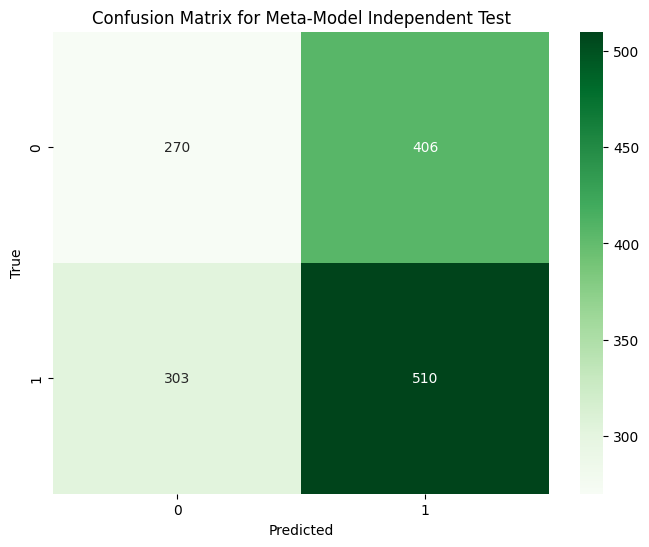

In [5]:
import _Data_Processing
from importlib import reload
reload(_Data_Processing)
lstm_format = False
X_test, _, __,\
y_test, ___, ____,\
feature_subsets =\
_Data_Processing.preprocess_data(
	file_name   =		'pricearea_test.csv'
	,indp_size  =		0.01
	,test_size  =		0.01
	,shfl_splt	=		False
	,t_start    =		645
	,t_end		=		720
	,mod_type	=		'Area_Classification'
	,target_t	=		30
	,num_class	=		2
	,split_val	=		5
	,verbose	=		1
	,scaler		=		'Standard'
	,frmt_lstm	=		lstm_format
	,time_steps =		5
	,keep_price =		False
)

from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import _Master_Model
from importlib import reload
reload(_Master_Model)

test_on_X = X_test
test_on_y = y_test

loadmodel = _Master_Model.Master(
    model_depth=2
)
loadmodel.load_model('fair_model_around54avg')
m_pred = loadmodel.master_predict(test_on_X, threshold=0.5)
print(accuracy_score(test_on_y, m_pred))

#Create the confusion matrix
cm = confusion_matrix(test_on_y, m_pred)
# Plot the confusion matrix using seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens', \
			xticklabels=range(2), yticklabels=range(2))
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title(f'Confusion Matrix for Meta-Model Independent Test')
plt.show()